<a href="https://colab.research.google.com/github/Rhythm1821/Number-Plate-Detection/blob/main/Number_Plate_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Get the data

### 1.1 Import dependencies

In [47]:
from zipfile import ZipFile
from pathlib import Path
import requests
import os, cv2

### 1.2 Extract data from github

In [37]:
data_path = Path('data/')
image_path = Path(data_path / "images")
url = "https://github.com/Rhythm1821/Colab-Project-Data/raw/main/anpr/num_plates.zip"
data_path.mkdir(parents=True,exist_ok=True)
image_path.mkdir(parents=True,exist_ok=True)

with open("num_plates.zip","wb") as f:
  request = requests.get(url)
  f.write(request.content)

with ZipFile("num_plates.zip","r") as zip_ref:
  zip_ref.extractall(image_path)
print('Data extracted')

Data extracted


## 2 Preprocess data

### 2.1 Remove images less than 10kb size

In [38]:
len(os.listdir(image_path))

186

In [39]:
for image in os.listdir(image_path):
  image = image_path / image
  image_size = os.path.getsize(image) / 1024
  if image_size < 10:
    os.remove(image)
    print(f"Removed {image} - Size: {image_size} bytes")

Removed data/images/vector.svg - Size: 0.556640625 bytes
Removed data/images/vector12.svg - Size: 0.462890625 bytes
Removed data/images/images15.jpg - Size: 2.4091796875 bytes
Removed data/images/images12.jpg - Size: 9.5634765625 bytes
Removed data/images/vector8.svg - Size: 0.2412109375 bytes
Removed data/images/images42.jpg - Size: 9.1240234375 bytes
Removed data/images/image5.jpeg - Size: 3.3515625 bytes
Removed data/images/vector3.svg - Size: 0.6083984375 bytes
Removed data/images/image23.jpeg - Size: 7.5625 bytes
Removed data/images/image29.png - Size: 2.9765625 bytes
Removed data/images/images21.jpg - Size: 2.947265625 bytes
Removed data/images/vector5.svg - Size: 0.185546875 bytes
Removed data/images/images17.jpg - Size: 3.95703125 bytes
Removed data/images/images28.jpg - Size: 2.4677734375 bytes
Removed data/images/vector6.svg - Size: 0.60546875 bytes
Removed data/images/images33.jpg - Size: 9.10546875 bytes
Removed data/images/images38.jpg - Size: 2.52734375 bytes
Removed data

In [40]:
len(os.listdir(image_path))

108

### 2.2 Split the data

In [58]:
img = cv2.imread(os.path.join('data','images','1692681128559'))

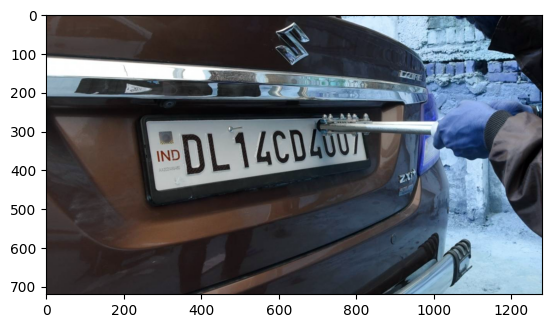

In [56]:
import matplotlib.pyplot as plt
plt.imshow(img)

## 3 Data augmentation

In [60]:
!pip install Augmentor

In [127]:
# import shutil
# shutil.rmtree('data/aug_data')

In [128]:
aug_data_path = Path(data_path / "aug_data")
aug_data_path.mkdir(parents=True,exist_ok=True)
aug_image_path = Path(aug_data_path / "images")
aug_image_path.mkdir(parents=True,exist_ok=True)

In [129]:
input_folder = "data/images"
output_folder = "data/aug_data/images"

In [130]:
import random
from PIL import Image, ImageEnhance

# List all image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith((".jpg", ".jpeg", ".png", ".svg"))]

# Set the number of images to generate
num_augmented_images = 1000

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Perform augmentation and save augmented images
for i in range(num_augmented_images):
  try:
    # Choose a random image file
    random_image_file = random.choice(image_files)
    image_path = os.path.join(input_folder, random_image_file)

    # Open the image
    image = Image.open(image_path)

    # Apply augmentation operations
    # For example, let's apply random contrast enhancement
    contrast_factor = random.uniform(0.7, 1.3)
    enhancer = ImageEnhance.Contrast(image)
    augmented_image = enhancer.enhance(contrast_factor)

    # Convert to RGB mode if not already
    if augmented_image.mode != "RGB":
        augmented_image = augmented_image.convert("RGB")

    # Save the augmented image
    output_path = os.path.join(output_folder, f"augmented_{i}.jpg")
    augmented_image.save(output_path)

    # Close the images
    image.close()
    augmented_image.close()
  except Exception as e:
    print(e)
    # print(i)

print("Data augmentation completed.")

image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
image has wrong mode
Data augmentation completed.


In [131]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1064 files belonging to 2 classes.


In [132]:
data_iterator = data.as_numpy_iterator()

In [133]:
batch = data_iterator.next()

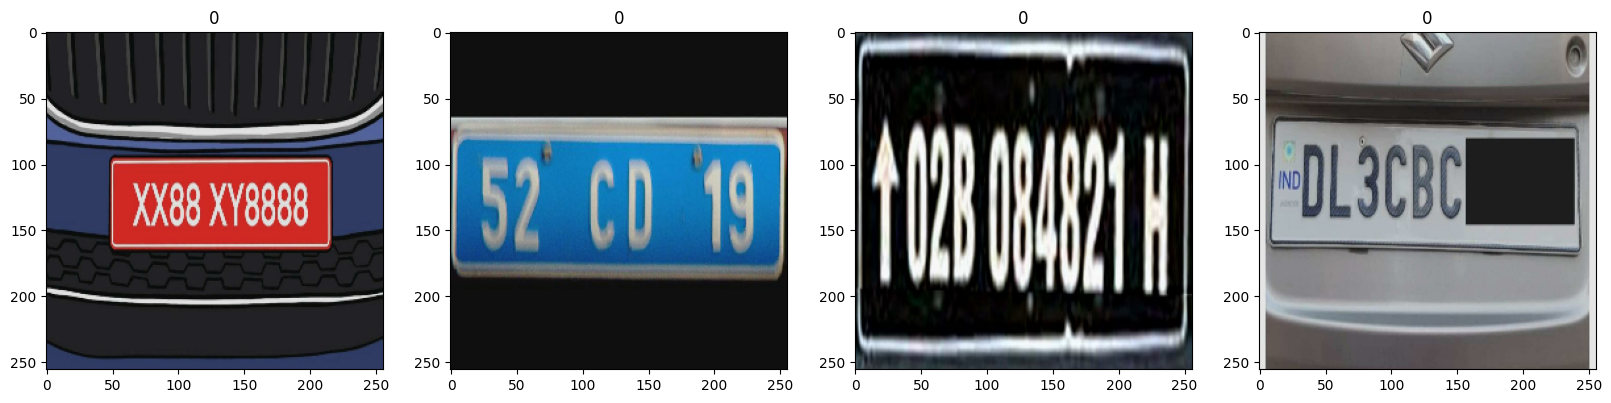

In [134]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

## 4 Split the data

### 4.1 Create train,test,val folders

In [135]:
dirs = ['train','test','val']

image_path = Path("data/images")

for dir in dirs:
  Path(image_path / dir).mkdir(parents=True,exist_ok=True)
  Path(aug_data_path / dir).mkdir(parents=True,exist_ok=True)

### 4.2 Take the train,test,val ratio

In [137]:
total_images = len(os.listdir(image_path))
total_aug_images = len(os.listdir(aug_image_path))
train_ratio = 0.7
# test_ratio = 0.2
val_ratio = 0.1

In [150]:
train_count = int(total_images * train_ratio)
val_count = int(total_images * val_ratio)
test_count = total_images - train_count - val_count